In [238]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from imblearn.over_sampling import SMOTE, BorderlineSMOTE

In [239]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')

df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [240]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [242]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Null values in {column}: {null_count}")

Null values in id: 0
Null values in gender: 0
Null values in age: 0
Null values in hypertension: 0
Null values in heart_disease: 0
Null values in ever_married: 0
Null values in work_type: 0
Null values in Residence_type: 0
Null values in avg_glucose_level: 0
Null values in bmi: 201
Null values in smoking_status: 0
Null values in stroke: 0


In [243]:
for column in df.columns:
  print(column)
  print(df[column].unique())
  print(df[column].dtype,"\n")

id
[ 9046 51676 31112 ... 19723 37544 44679]
int64 

gender
['Male' 'Female' 'Other']
object 

age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-

In [244]:
other_gender_count = (df['gender'] == 'Other').sum()

print("Number of rows with gender 'Other':", other_gender_count)
other_smoker_count = (df['smoking_status'] == 'Unknown').sum()

print("Number of rows with smoking status 'Unknown':", other_smoker_count)


Number of rows with gender 'Other': 1
Number of rows with smoking status 'Unknown': 1544


In [245]:
df = df[df['gender'] != 'Other']

imputer = KNNImputer(n_neighbors=5)
df['bmi'] = imputer.fit_transform(df[['bmi']])
mode_smoking_status = df['smoking_status'].mode()[0]
df['smoking_status'].replace('Unknown', mode_smoking_status, inplace=True)

df.dropna(inplace=True)

df.sample(n = 10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4888,39936,Female,49.0,0,0,Yes,Private,Rural,61.57,37.9,formerly smoked,0
2838,30622,Female,44.0,0,0,Yes,Govt_job,Rural,115.99,20.9,never smoked,0
1896,47972,Female,25.0,0,0,No,Govt_job,Rural,74.11,34.1,smokes,0
2589,31402,Female,62.0,0,0,Yes,Self-employed,Rural,102.21,36.3,never smoked,0
3337,32317,Female,41.0,0,0,Yes,Private,Urban,80.72,34.1,smokes,0
4804,9565,Female,39.0,0,0,No,Private,Rural,79.00,30.0,never smoked,0
1233,39823,Female,41.0,0,0,Yes,Govt_job,Rural,229.86,35.2,smokes,0
1271,11882,Male,34.0,0,0,No,Private,Urban,94.15,28.6,never smoked,0
1743,62793,Male,37.0,0,0,Yes,Private,Urban,79.56,25.2,never smoked,0
2722,28364,Male,61.0,0,0,Yes,Private,Urban,84.12,25.1,formerly smoked,0


In [246]:
for i in df.columns:
  print(i)
  print(df[i].unique())
  print(df[i].dtype,"\n")

id
[ 9046 51676 31112 ... 19723 37544 44679]
int64 

gender
['Male' 'Female']
object 

age
[6.70e+01 6.10e+01 8.00e+01 4.90e+01 7.90e+01 8.10e+01 7.40e+01 6.90e+01
 5.90e+01 7.80e+01 5.40e+01 5.00e+01 6.40e+01 7.50e+01 6.00e+01 5.70e+01
 7.10e+01 5.20e+01 8.20e+01 6.50e+01 5.80e+01 4.20e+01 4.80e+01 7.20e+01
 6.30e+01 7.60e+01 3.90e+01 7.70e+01 7.30e+01 5.60e+01 4.50e+01 7.00e+01
 6.60e+01 5.10e+01 4.30e+01 6.80e+01 4.70e+01 5.30e+01 3.80e+01 5.50e+01
 1.32e+00 4.60e+01 3.20e+01 1.40e+01 3.00e+00 8.00e+00 3.70e+01 4.00e+01
 3.50e+01 2.00e+01 4.40e+01 2.50e+01 2.70e+01 2.30e+01 1.70e+01 1.30e+01
 4.00e+00 1.60e+01 2.20e+01 3.00e+01 2.90e+01 1.10e+01 2.10e+01 1.80e+01
 3.30e+01 2.40e+01 3.40e+01 3.60e+01 6.40e-01 4.10e+01 8.80e-01 5.00e+00
 2.60e+01 3.10e+01 7.00e+00 1.20e+01 6.20e+01 2.00e+00 9.00e+00 1.50e+01
 2.80e+01 1.00e+01 1.80e+00 3.20e-01 1.08e+00 1.90e+01 6.00e+00 1.16e+00
 1.00e+00 1.40e+00 1.72e+00 2.40e-01 1.64e+00 1.56e+00 7.20e-01 1.88e+00
 1.24e+00 8.00e-01 4.00e-01 8.00e

In [247]:
for column in df.columns:
    null_count = df[column].isnull().sum()
    print(f"Null values in {column}: {null_count}")


Null values in id: 0
Null values in gender: 0
Null values in age: 0
Null values in hypertension: 0
Null values in heart_disease: 0
Null values in ever_married: 0
Null values in work_type: 0
Null values in Residence_type: 0
Null values in avg_glucose_level: 0
Null values in bmi: 0
Null values in smoking_status: 0
Null values in stroke: 0


In [248]:
print(f"ٌRecords Duplicates: {df.duplicated().sum()}")

ٌRecords Duplicates: 0


In [249]:
label_encoder = LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Display the first few rows of the dataframe after encoding
df.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,1,67.0,0,1,1,2,1,228.69,36.60000,0,1
1,51676,0,61.0,0,0,1,3,0,202.21,28.89456,1,1
2,31112,1,80.0,0,1,1,2,0,105.92,32.50000,1,1
3,60182,0,49.0,0,0,1,2,1,171.23,34.40000,2,1
4,1665,0,79.0,1,0,1,3,0,174.12,24.00000,1,1
5,56669,1,81.0,0,0,1,2,1,186.21,29.00000,0,1
6,53882,1,74.0,1,1,1,2,0,70.09,27.40000,1,1
7,10434,0,69.0,0,0,0,2,1,94.39,22.80000,1,1
8,27419,0,59.0,0,0,1,2,0,76.15,28.89456,1,1
9,60491,0,78.0,0,0,1,2,1,58.57,24.20000,1,1


In [250]:
numerical_cols = ['age', 'avg_glucose_level', 'bmi']

In [251]:
df = df.drop(['id'], axis = 1)
df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.60000,0,1
1,0,61.0,0,0,1,3,0,202.21,28.89456,1,1
2,1,80.0,0,1,1,2,0,105.92,32.50000,1,1
3,0,49.0,0,0,1,2,1,171.23,34.40000,2,1
4,0,79.0,1,0,1,3,0,174.12,24.00000,1,1
5,1,81.0,0,0,1,2,1,186.21,29.00000,0,1
6,1,74.0,1,1,1,2,0,70.09,27.40000,1,1
7,0,69.0,0,0,0,2,1,94.39,22.80000,1,1
8,0,59.0,0,0,1,2,0,76.15,28.89456,1,1
9,0,78.0,0,0,1,2,1,58.57,24.20000,1,1


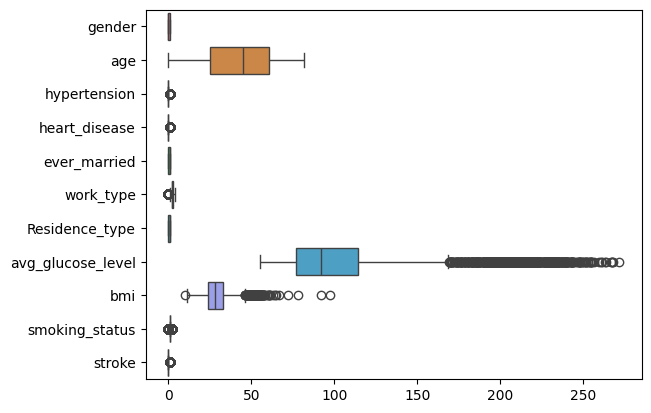

In [252]:
sns.boxplot(data=df, orient='h')
plt.show()

In [253]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

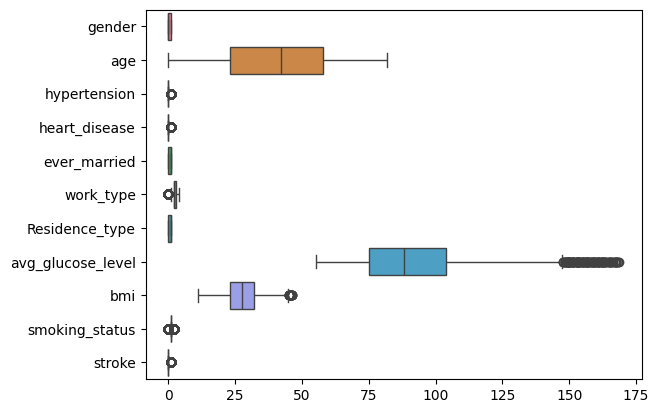

In [254]:
sns.boxplot(data=df, orient='h')
plt.show()

In [255]:
df['Has_Diabetes'] = (df['avg_glucose_level'] > 126).astype(int)

df['Is_Obese'] = (df['bmi'] > 30).astype(int)

df.head(10)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Has_Diabetes,Is_Obese
2,1,80.0,0,1,1,2,0,105.92,32.50000,1,1,0,1
6,1,74.0,1,1,1,2,0,70.09,27.40000,1,1,0,0
7,0,69.0,0,0,0,2,1,94.39,22.80000,1,1,0,0
8,0,59.0,0,0,1,2,0,76.15,28.89456,1,1,0,0
9,0,78.0,0,0,1,2,1,58.57,24.20000,1,1,0,0
10,0,81.0,1,0,1,2,0,80.43,29.70000,1,1,0,0
11,0,61.0,0,1,1,0,0,120.46,36.80000,2,1,0,1
12,0,54.0,0,0,1,2,1,104.51,27.30000,2,1,0,0
15,0,50.0,1,0,1,3,0,167.41,30.90000,1,1,1,1
18,0,60.0,0,0,0,2,1,89.22,37.80000,1,1,0,1


In [256]:
X = df.drop(['stroke'], axis=1)
y = df['stroke']

In [257]:
stroke_negative = (df['stroke'] == 0).sum()

print("Number of rows without stroke:", stroke_negative)

stroke_positive = (df['stroke'] == 1).sum()

print("Number of rows with stroke:", stroke_positive)

Number of rows without stroke: 4225
Number of rows with stroke: 165


In [258]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [259]:
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols]) 
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [260]:
print("X train: ", X_train.shape)
print("Y train: ", y_train.shape)
print("X test: ", X_test.shape)
print("Y test: ", y_test.shape)

X train:  (3073, 12)
Y train:  (3073,)
X test:  (1317, 12)
Y test:  (1317,)


In [261]:
stroke_negative = (y_train == 0).sum()

print("Number of rows without stroke:", stroke_negative)

stroke_positive = (y_train == 1).sum()

print("Number of rows with stroke:", stroke_positive)

Number of rows without stroke: 2960
Number of rows with stroke: 113


In [262]:
smote  = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [263]:
print("X train: ", X_train.shape)
print("Y train: ", y_train.shape)
print("X test: ", X_test.shape)
print("Y test: ", y_test.shape)

X train:  (5920, 12)
Y train:  (5920,)
X test:  (1317, 12)
Y test:  (1317,)


In [264]:
stroke_negative = (y_train == 0).sum()

print("Number of rows without stroke:", stroke_negative)

stroke_positive = (y_train == 1).sum()

print("Number of rows with stroke:", stroke_positive)

Number of rows without stroke: 2960
Number of rows with stroke: 2960


In [265]:
print(f"ٌRecords Duplicates: ", df.duplicated().sum())

ٌRecords Duplicates: 0


In [266]:
best_params = None

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy'],
    'class_weight': [None, 'balanced']
}
 
model = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='f1_weighted', cv=10, n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}


Confusion Matrix:
 [[1182   83]
 [  42   10]]
Accuracy: 0.9051
Precision: 0.1075
Recall: 0.1923
F1 Score: 0.1379
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.93      0.95      1265
           1       0.11      0.19      0.14        52

    accuracy                           0.91      1317
   macro avg       0.54      0.56      0.54      1317
weighted avg       0.93      0.91      0.92      1317



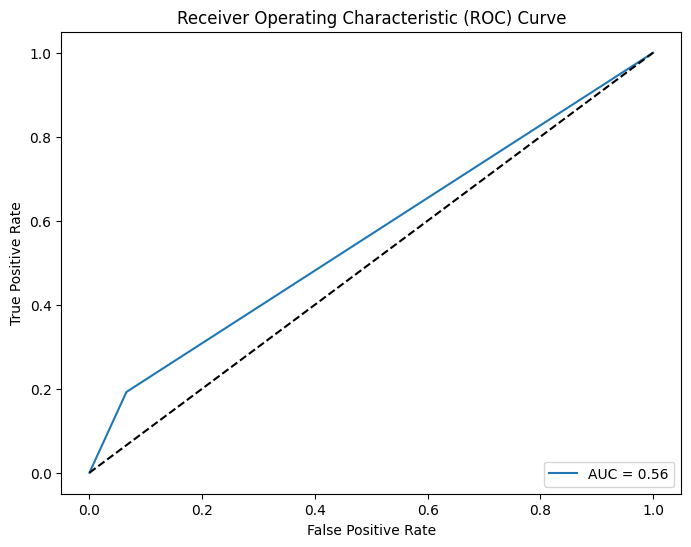

AUC: 0.5633


In [267]:
final_model = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], criterion=best_params['criterion'], class_weight=best_params['class_weight'], random_state=42)
final_model.fit(X_train, y_train)

y_pred = final_model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.4f}")

class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.4f}")


In [268]:
y_train_pred = final_model.predict(X_train)
print("Accuracy score: ", accuracy_score(y_train, y_train_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))

Accuracy score:  1.0
Accuracy score:  0.9050873196659074


In [269]:

# data_to_predict = {
#     'gender': 'Male',
#     'age': 55,
#     'hypertension': 1,
#     'heart_disease': 0,
#     'ever_married': 'Yes',
#     'work_type': 'Private',
#     'Residence_type': 'Urban',
#     'avg_glucose_level': 85.5,
#     'bmi': 28.0,
#     'smoking_status': 'Unknown'
# }

# data_to_predict_df = pd.DataFrame([data_to_predict])
# gender_mapping = {'Male': 1, 'Female': 0}
# ever_married_mapping = {'Yes': 1, 'No': 0}
# work_type_mapping = {'Private': 0, 'Self-employed': 1, 'Govt_job': 2, 'children': 3, 'Never_worked': 4}
# residence_type_mapping = {'Urban': 1, 'Rural': 0}
# smoking_status_mapping = {'formerly smoked': 0, 'never smoked': 1, 'smokes': 2}

# data_to_predict_df['smoking_status'].replace('Unknown', mode_smoking_status, inplace=True)
# data_to_predict_df.dropna(inplace=True)

# data_to_predict_df['gender'] = data_to_predict_df['gender'].map(gender_mapping)
# data_to_predict_df['ever_married'] = data_to_predict_df['ever_married'].map(ever_married_mapping)
# data_to_predict_df['work_type'] = data_to_predict_df['work_type'].map(work_type_mapping)
# data_to_predict_df['Residence_type'] = data_to_predict_df['Residence_type'].map(residence_type_mapping)
# data_to_predict_df['smoking_status'] = data_to_predict_df['smoking_status'].map(smoking_status_mapping)

# prediction = final_model.predict(data_to_predict_df)

# print("Prediction:", prediction[0])
